In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1

     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 448 kB 64.0 MB/s 
     |████████████████████████████████| 26.1 MB 1.3 MB/s 
     |████████████████████████████████| 3.8 MB 46.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 377 kB 7.1 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### 1. Write a Python code to identify  a person with his/her image. There should be at least 6 people's images as the input data.


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/image_classification/task_image_detect/


/content/drive/MyDrive/Colab Notebooks/image_classification/task_image_detect


In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow
print(tensorflow.__version__ )

2.8.2


#Data Preprocessing

In [5]:
import cv2,os
data_path='/content/drive/MyDrive/Colab Notebooks/image_classification/task_image_detect/dataset/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'lionel_messi': 0, 'virat_kohli': 1, 'maria_sarapowa': 2, 'ms_dhoni': 3, 'roger_fedderer': 4, 'serena_williams': 5}
['lionel_messi', 'virat_kohli', 'maria_sarapowa', 'ms_dhoni', 'roger_fedderer', 'serena_williams']
[0, 1, 2, 3, 4, 5]


In [6]:
img_size=100
data = []
target = []

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

#Recale and assign  catagorical lables

In [7]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [8]:
new_target.shape

(353, 6)

#CNN Model

In [9]:

data.shape

(353, 100, 100, 3)

In [10]:

data.shape[1:]

(100, 100, 3)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(6,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_4 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_5 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  



#Splittiong data into traning and testing

In [29]:

from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [30]:
train_data.shape

(282, 100, 100, 3)

In [31]:
train_target.shape

(282, 6)

In [33]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=150,validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0256 - accuracy: 0.9956 - val_loss: 0.5414 - val_accuracy: 0.8596
Epoch 2/150
8/8 [==============================] - 0s 42ms/step - loss: 0.0394 - accuracy: 0.9911 - val_loss: 0.3443 - val_accuracy: 0.9123
Epoch 3/150
8/8 [==============================] - 0s 43ms/step - loss: 0.0175 - accuracy: 0.9956 - val_loss: 0.3784 - val_accuracy: 0.8772
Epoch 4/150
8/8 [==============================] - 0s 43ms/step - loss: 0.0225 - accuracy: 0.9911 - val_loss: 0.1760 - val_accuracy: 0.9298
Epoch 5/150
8/8 [==============================] - 0s 42ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.3532 - val_accuracy: 0.9123
Epoch 6/150
8/8 [==============================] - 0s 42ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.3742 - val_accuracy: 0.9123
Epoch 7/150
8/8 [==============================] - 0s 43ms/step - loss: 0.0361 - accuracy: 0.9911 - val_loss: 0.5325 - val_accuracy: 0.8772
Epoch 8/150
8/8 [===

In [38]:
model.save('modeel.h5')

In [ ]:
model.predict(test_data)

ValueError: ignored

In [35]:
from matplotlib import pyplot as plt

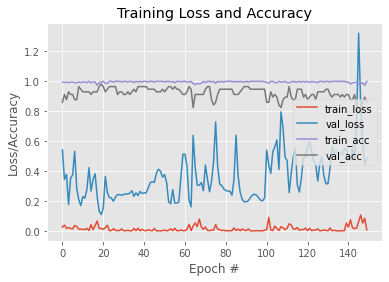

In [37]:
# plot the training loss and accuracy
N = 150
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")